## MusicXML input / output

In [1]:
from maelzel.core import *
import os
from IPython.display import Image

This is the output produced by MuseScore when importing the file `assets/schoenberg-op19-II.musicxml`

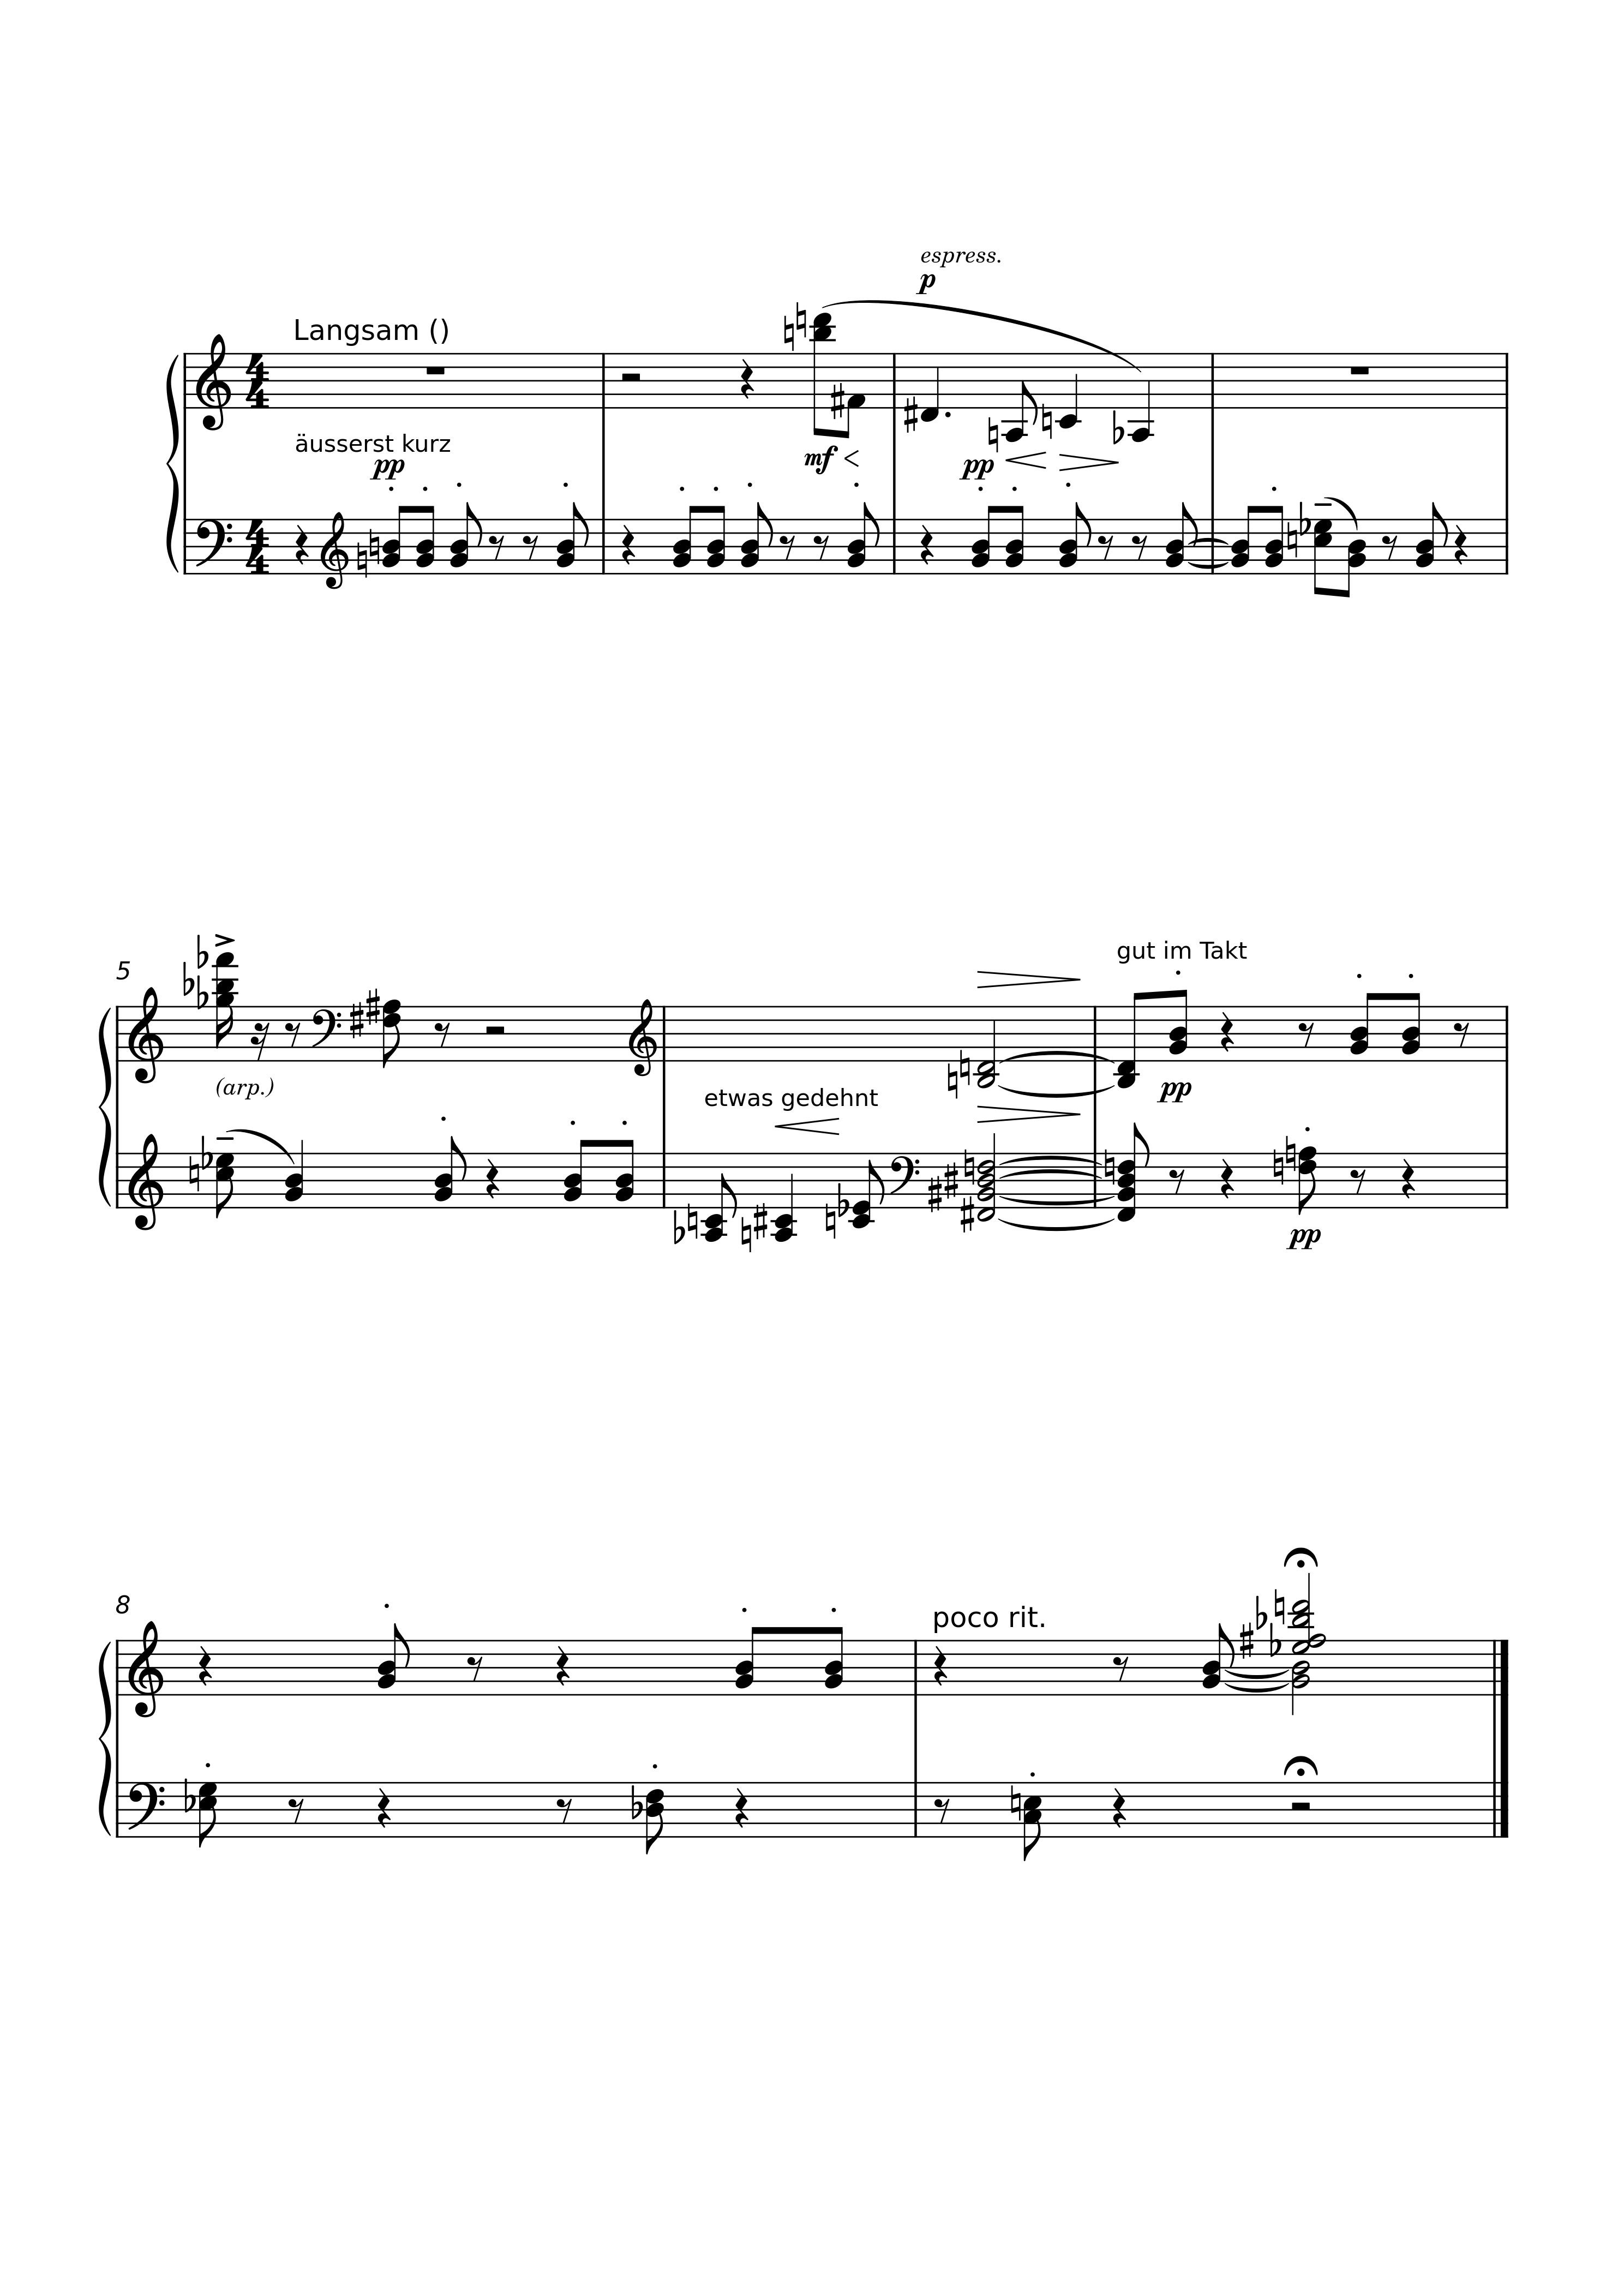

In [2]:
Image("assets/schoenberg-op19.png", width=800)

In order to parse a musicxml score we use `Score.read`, which reads any of the supported input formats. Notice that some elements are not fully imported. In particular, multiple voices per part of multistaff parts are still not well supported. This can be seen here were the upper voice in the upper staff (containing only one chord at the end) is extracted to its own staff

[maelzel.core:musicxmlparser.py:429:_parseNote:ERROR] No start spanner found for key slur-1


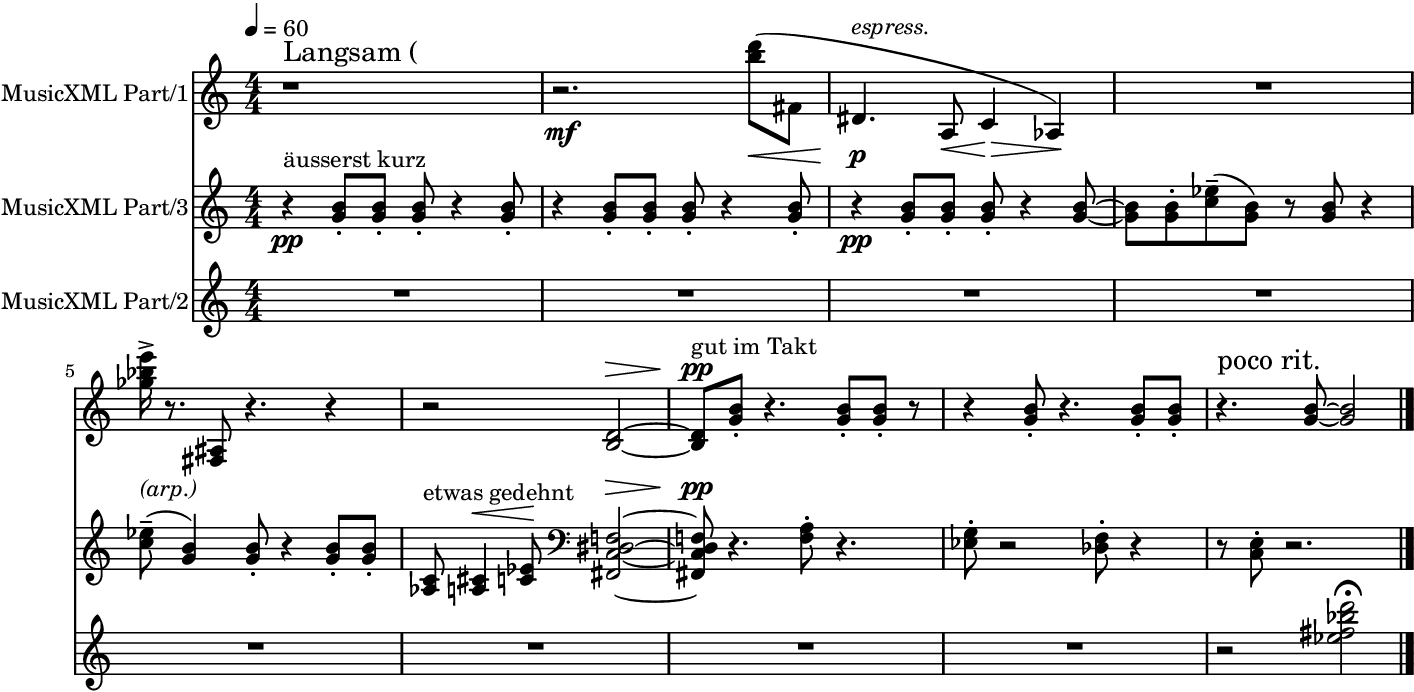

In [2]:
s = Score.read("assets/schoenberg-op19-II.musicxml")
s.show(backend='lilypond')

Musicxml rendering depends heavily on the rendering application. This, for example, is the output produced by MuseScore 4

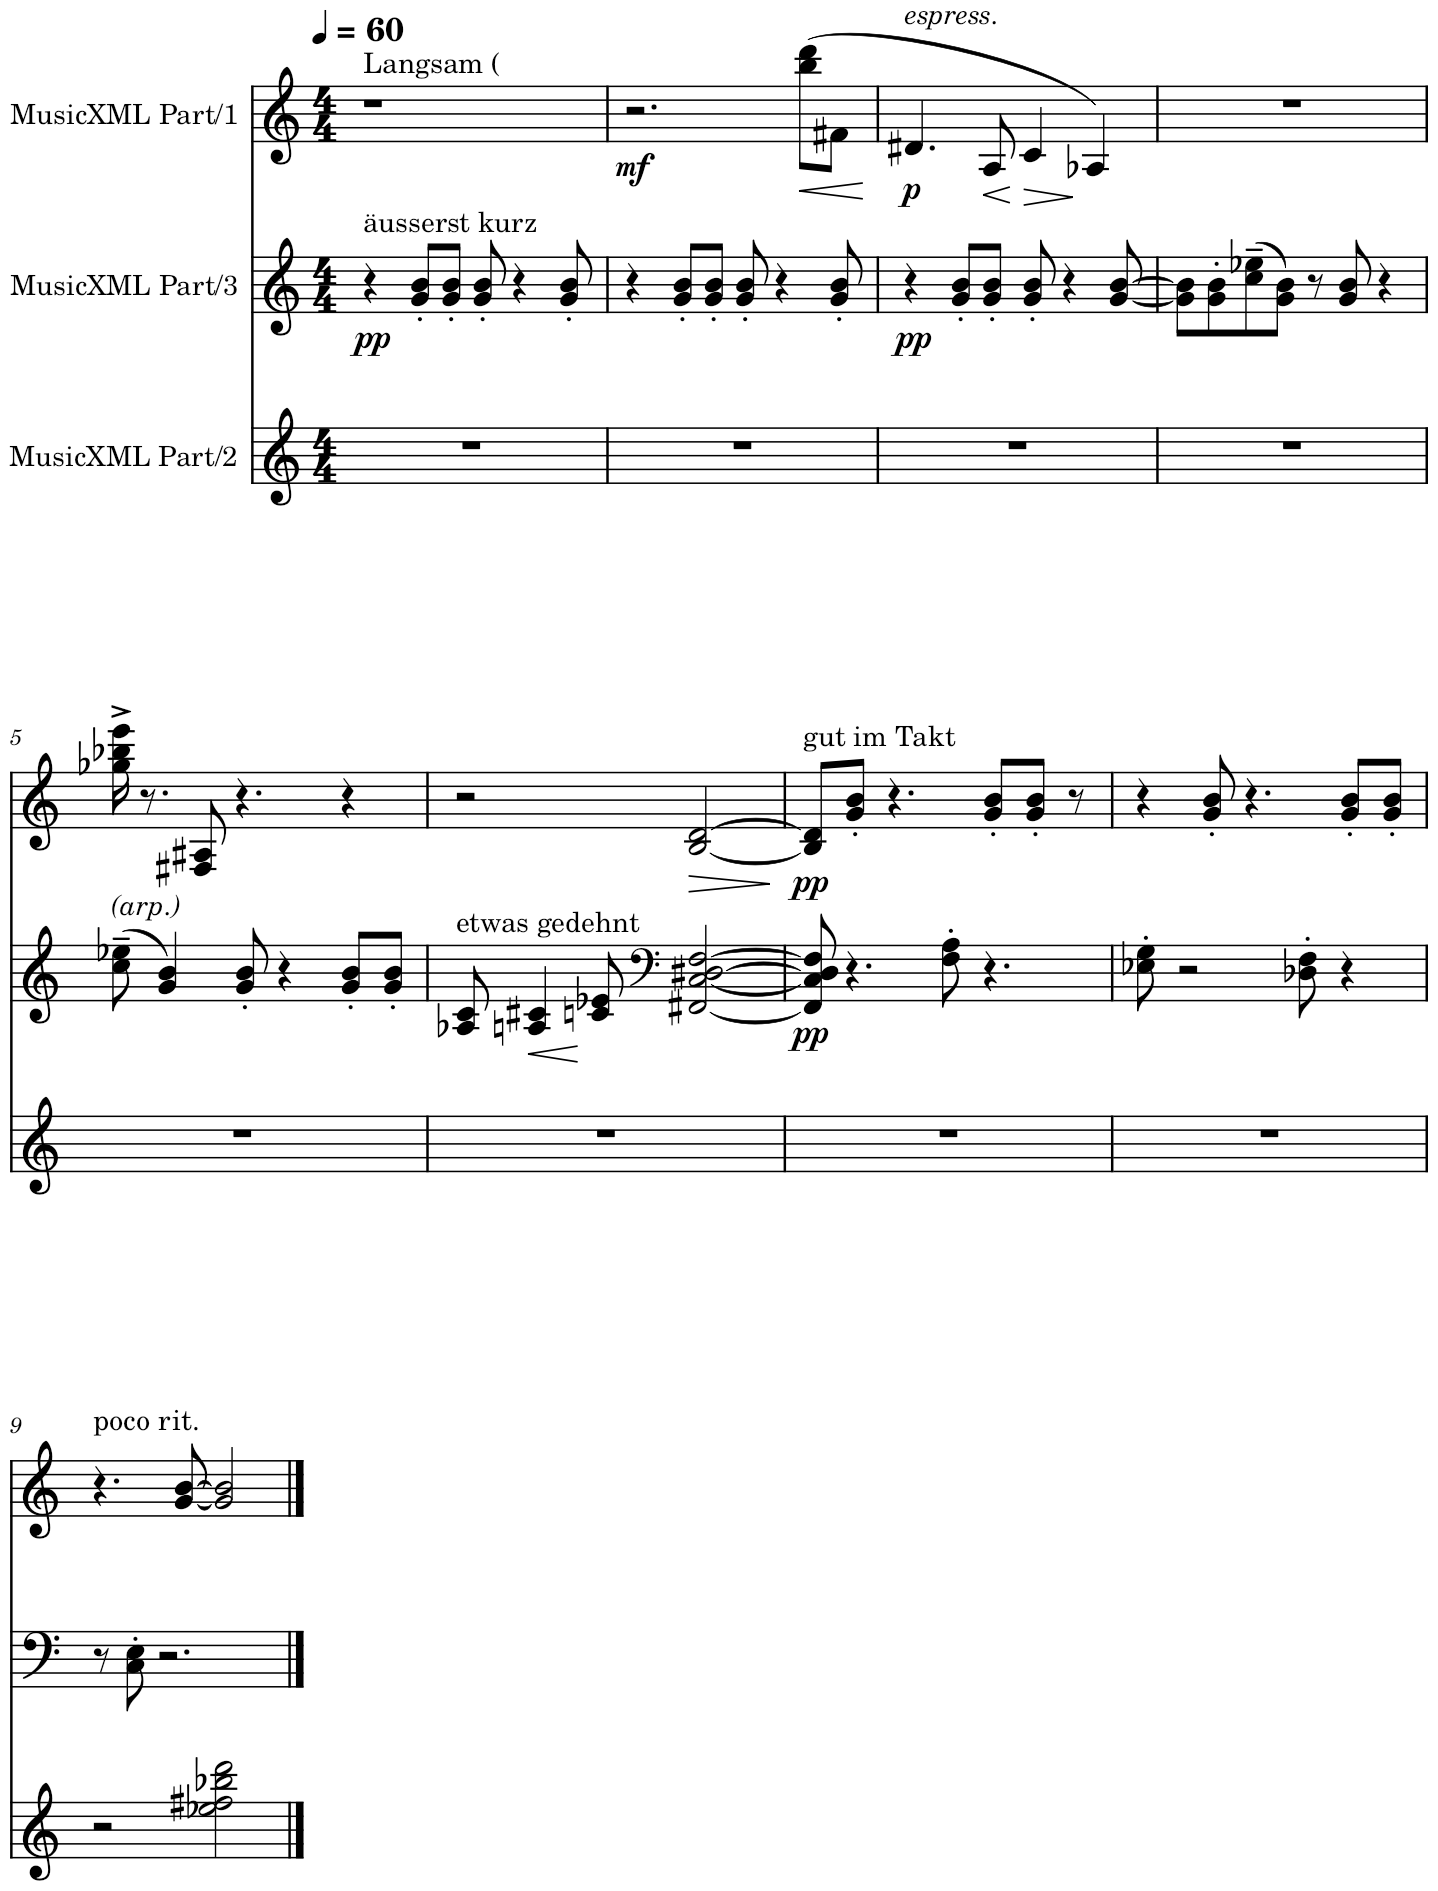

In [9]:
s.show(backend='musicxml')

Exporting to musicxml (as well as any other supported format) is done via the `.write` method

In [14]:
s.write("~/tmp/schoenberg.musicxml")

! head -n 200 ~/tmp/schoenberg.musicxml

<?xml version="1.0" ?>
<!DOCTYPE score-partwise
  PUBLIC '-//Recordare//DTD MusicXML 4.0 Partwise//EN'
  'http://www.musicxml.org/dtds/partwise.dtd'>
<score-partwise version="4.0">
  <defaults>
    <scaling>
      <millimeters>5.291666666666667</millimeters>
      <tenths>40</tenths>
    </scaling>
    <page-layout>
      <page-height>11880</page-height>
      <page-width>8400</page-width>
    </page-layout>
  </defaults>
  <part-list>
    <score-part id="P1">
      <part-name>MusicXML Part/1</part-name>
    </score-part>
    <score-part id="P2">
      <part-name>MusicXML Part/3</part-name>
    </score-part>
    <score-part id="P3">
      <part-name>MusicXML Part/2</part-name>
    </score-part>
  </part-list>
  <part id="P1">
    <measure number="1">
      <attributes>
        <divisions>1</divisions>
        <time>
          <beats>4</beats>
          <beat-type>4</beat-type>
        </time>
        <clef>
          <sign>G</sign>
          <line>2</line>
        </clef>
        <staf

## MusicXML vs Lilypond

Most of the features supported by lilypond are supported by musicxml as well. For example, **microtones**, **complex glissandi**, **gracenotes**, as well as notehead shapes, articulations and spanners (slurs, hairpins, etc) are all exported correctly and interpreted correctly by all tested rendering applications (MuseScore, Finale, Dorico). There are some features which are supported by  musicxml itself but not by some of these applications. In particular, **nested tuplets are not supported by MuseScore** at the moment. For that reason, the default is not to generate nested tuplets in the first place when rendering musicxml. 

Other minor features not supported by some of the musicxml renderers are **notehead sizes**, some element colors (and probably many more which have not been tested). 

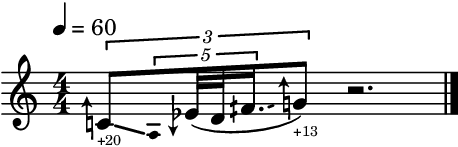

In [11]:
v = Voice([
    "4C+20:1/3:gliss",
    "3A:0:stemless",
    "4Eb-25:1/15:slur",
    "4D:1/15",
    "4F+:3/15:gliss",
    "4G+13:1/3:~slur",
])
v.show(backend='lilypond')

When rendered via musicxml using MuseScore, **nested tuplets are disabled**. With the default quantization complexity (*'high'*), the quantization is not perfectly accurate. The first eighth note is divided into 9, which results in a duration of 1/18 of a quarternote for the 2nd and 3rd notes, instead of 1/15. This is innacurate by 1/90th of a quarternote. 

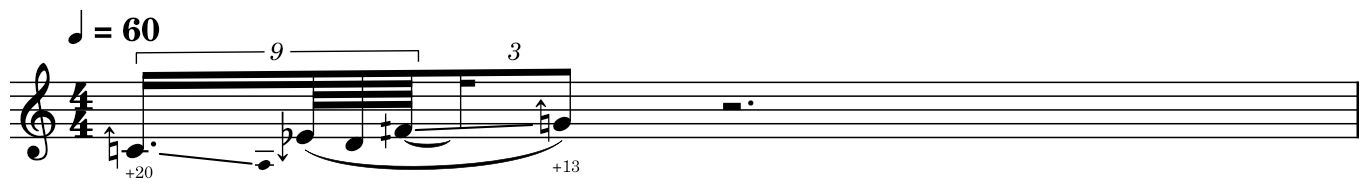

In [12]:
v.show(backend='musicxml')

If we instead use the **highest quantization complexity**, then the correct subdivision is found while still avoiding nested tuplets

Notice that it is possible to disable the display of cents as annotations via the config

[maelzel.scoring:spanner.py:150:collectUnmatchedSpanners:WARNING] Duplicate spanner in «0.933:1.000 1/15♩ 15/8 4G+13 tiedPrev spanners=[Slur(kind=end, linetype=solid, nestingLevel=1, uuid=zlce86zz)]»: Slur(kind=end, linetype=solid, nestingLevel=1, uuid=zlce86zz)
   already seen in «0.667:0.933 4/15♩ 15/8 4G+13 tiedNext spanners=[Slur(kind=end, linetype=solid, nestingLevel=1, uuid=zlce86zz)]»  -- removing it


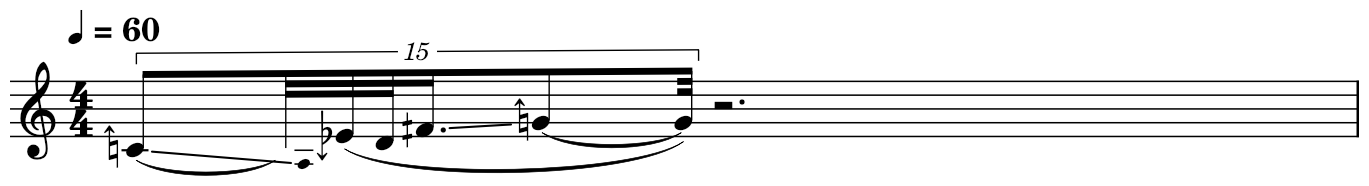

In [9]:
with CoreConfig() as cfg:
    cfg['quant.complexity'] = 'highest'
    cfg['show.centsDeviationAsTextAnnotation'] = False
    v.show(backend='musicxml')